# 어떤 테이블에, 언제 가야 Tip을 가장 많이 받을 수 있을까?

### Tip 데이터셋에서 가장 높은 Tip을 받기 위한 전략 짜기

### 학습 목표
- 각 테이블 별로 전체 금액, 팁 금액, 성별 등의 정보가 담겨있는 Tip 데이터셋을 자세히 살펴본다.
- 데이터를 pandas, numpy, matplotlib 등의 패키지로 다루는 데에 익숙해진다.
- 각 Column별로 Tip이 높아지는 경향성을 찾아보며 어떤 특징의 테이블에 언제 가야 더 많이 받을 수 있는지 분석해본다.

---

## Contents

#### 1. 데이터 분석 준비하기

#### 2. 데이터셋 뜯어보기

#### 3. 가설을 세우고 그에 따라 세부 분석해보기
- 가설 첫 번째 : size는 tip을 결정짓는 거의 가장 중요한 요소이다
- 가설 두 번째 : tip_rate가 10%이하인 손님은 어떤 이유가 있을것이다

---

# 1. 데이터 분석 준비하기

본격적으로 데이터를 분석하기에 앞서, 먼저 앞으로의 데이터 분석에 필요한 module을 import 해 봅니다.
지금까지 배웠던 numpy, pandas, matplotlib과 함께 또다른 시각화 툴인 seaborn 까지 사용해 보겠습니다.

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Load Dataset

이번 데이터셋은 데이터 시각화 패키지인 seaborn 패키지 안에 포함되어 있습니다.     
seaborn은 matplotlib과 비슷하게 데이터에 대한 시각화를 제공하는 패키지인데요, 간단하고 가벼운 그래프에 최적화 되어있는 matplotlib과 달리, 시각화 자체의 기능을 더 살려서 예쁘고 다양한 형태의 그래프를 그릴 수 있도록 만들어진 패키지입니다.     

- https://matplotlib.org/tutorials/introductory/sample_plots.html
- http://seaborn.pydata.org/


seaborn은 간단한 데이터셋으로 여러 실험을 해볼 수 있도록 샘플 데이터셋을 제공합니다.    
제공되는 데이터셋은 다음 함수로 확인할 수 있습니다.

In [2]:
# 빨간 warning message를 보고싶지 않다면
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

비행 데이터를 담은 flights, 붓꽃 데이터를 담은 iris 등 여러가지 데이터가 있네요.    
이 중 우리가 오늘 사용해 볼 데이터셋은 Tip 데이터입니다. `sns.load_dataset("tips")` 으로 데이터셋을 가져와 보겠습니다.    


다른 데이터들이 어떤 데이터인지 궁금하다면 직접 사용해보는 것을 추천합니다!

참고로, 저희는 데이터셋을 가져와서 원본은 따로 저장을 해두고, 복사한 데이터셋을 사용합니다.    
꼭 이렇게 해야만 하는 것은 아니지만, 데이터를 다루다보면 데이터셋을 종종 바꾸는 일이 있기 때문에 원본 데이터셋은 따로 저장해두는 습관을 가지는 것이 좋습니다.

In [4]:
original_data = sns.load_dataset("tips")
tips = original_data.copy()
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


총 244개의 행과 7개의 열로 이루어져 있군요.     
각 행은 식당에서 음식을 먹고 금액을 지불한 총 금액입니다. 즉, 테이블 단위로 데이터가 쌓여있다고 봐도 좋을 것 같아요.     
각 데이터는 `total_bill`, `tip`, `sex`, `smoker`, `day`, `time`, `size` 7개의 정보를 담고 있습니다.

### `tip_rate` 컬럼 추가
흠, 우리는 어떤 테이블이 Tip을 많이 주는지를 본다고 했죠. 그렇다면 어떤 데이터가 또 있으면 좋을까요?    
Tip은 일반적으로 전체 금액에 비례하게 지불하니, 팁을 몇 퍼센트나 줬는지 확인해보면 좋을 것 같습니다.    

`tip`을 `total_bill`로 나눈 `tip_rate` 컬럼을 새로 만들어보겠습니다.

In [5]:
tips["tip_rate"] = round(tips["tip"] / tips["total_bill"] * 100, 2)
print(tips.shape)
tips.head()

(244, 8)


,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


`round` (반올림) 함수를 이용해서 깔끔하게 나타나졌네요.

---

# 2. 데이터셋 뜯어보기
본격적으로 데이터셋을 하나하나 뜯어보도록 합니다. 데이터를 완벽하게 이해해야 원하는 결론도 낼 수 있다는 점을 잊지 마세요!

### (1) `sex` : 웨이터의 성별

성별은 어떤 데이터로 이루어져 있고, 각 데이터는 몇 개씩 있을까요?    



먼저 pandas의 `groupby` 함수를 이용해서 확인해보겠습니다.   


`groupby` 함수는 `dataset.groupby("column")` 의 형태로 사용하며, 그 뒤에 원하는 통계량을 붙여주어야 값을 확인할 수 있습니다.     
우리는 값의 개수를 확인할 것이므로, `size()`를 사용해보겠습니다.

In [6]:
tips.groupby("sex").size()

sex
Male      157
Female     87
dtype: int64

위 결과는 **Series**의 데이터 자료형으로 표현된 것입니다. **Series** 자료형이란, pandas에서 컬럼이 단 한 개인 데이터셋을 다루는 자료형입니다.    
위 형태를 pandas의 DataFrame으로 보고싶다면 `reset_index`를 활용해서 index를 만들어 주면 됩니다.

In [7]:
sex_count = tips.groupby("sex").size().reset_index(name="counts")
sex_count

,sex,counts
0,Male,157
1,Female,87


index의 이름을 우리가 보고싶었던 데이터인  `"counts"`로 설정하니 깔끔하게 확인이 되었네요!

다음은 그래프로도 확인해 보겠습니다. 앞서 소개했던 matplotlib의 상위 버전인 seaborn을 사용하도록 하죠.    
다만, seaborn도 matplotlib을 기반으로 만들어진 패키지이기 때문에 plt 함수를 활용해서 더 많은 동작을 실행할 수 있습니다.

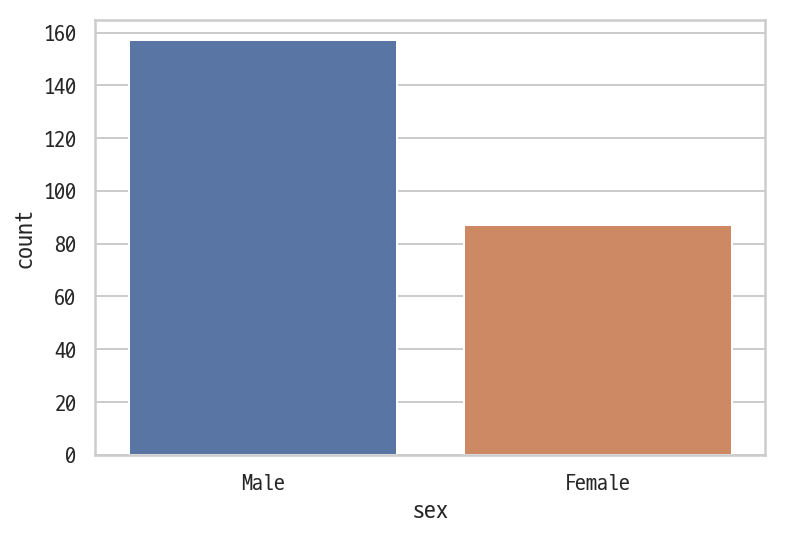

In [8]:
sns.countplot(data=tips, x="sex")
plt.show()

네, 그래프로 보니 남자 웨이터가 더 많은 것이 확실히 보이는군요. 약 2:1의 성비를 담고 있는 것으로 보입니다.

정확한 비율이 궁금하다면 다음과 같이 계산해볼 수 있죠!

In [9]:
print("Male   ", "{:.1f}%".format(sex_count.loc[0, "counts"] / len(tips) * 100))
print("Female ", "{:.1f}%".format(sex_count.loc[1, "counts"] / len(tips) * 100))

Male    64.3%
Female  35.7%


### (2) `smoker` : 손님의 흡연 여부

smoker의 데이터 개수는 이제 간단하게 확인할 수 있겠습니다.

In [10]:
tips.groupby("smoker").size().reset_index(name="counts")

,smoker,counts
0,Yes,93
1,No,151


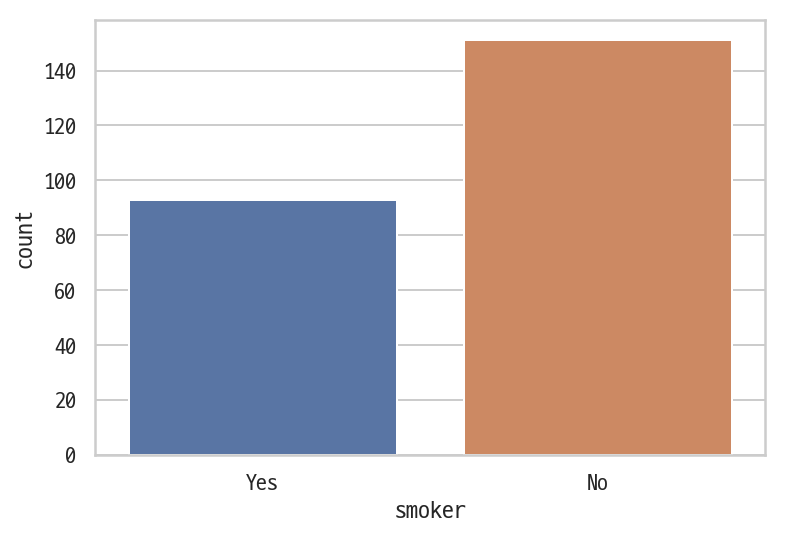

In [11]:
sns.countplot(data=tips, x="smoker")
plt.show()

### (3) `day`, `time` : 요일, 시간

이번에는 day와 time 별로 데이터 상황을 살펴보겠습니다.    


여러 값이 있는 데이터를 살펴보는 것은 `pivot_table`를 활용하면 간단합니다.     
`pivot_table`에서 데이터의 개수를 세기 위해 `counts`라는 컬럼을 만들어주겠습니다. 

In [12]:
tips["counts"] = 1
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,1
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,1
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,1
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,1
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,1


이제 `pivot_table`을 counts에 대한 sum(총합)을 이용하면 간단하게 각 시간/요일 별 데이터 수를 확인할 수 있겠죠!

In [13]:
tips.pivot_table("counts", ["time"], ["day"], aggfunc=np.sum)

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61.0,7.0,NaN,NaN
Dinner,1.0,12.0,87.0,76.0


앗, day에는 목, 금, 토, 일 데이터만 있는 것 같아 보입니다. 또한, 토요일과 일요일은 장사를 안하는 것 같군요!

그래프로도 확인을 해보죠. time별로 확인하고 싶다면 `hue`라는 파라미터에 `"time"`을 입력해주면 됩니다.

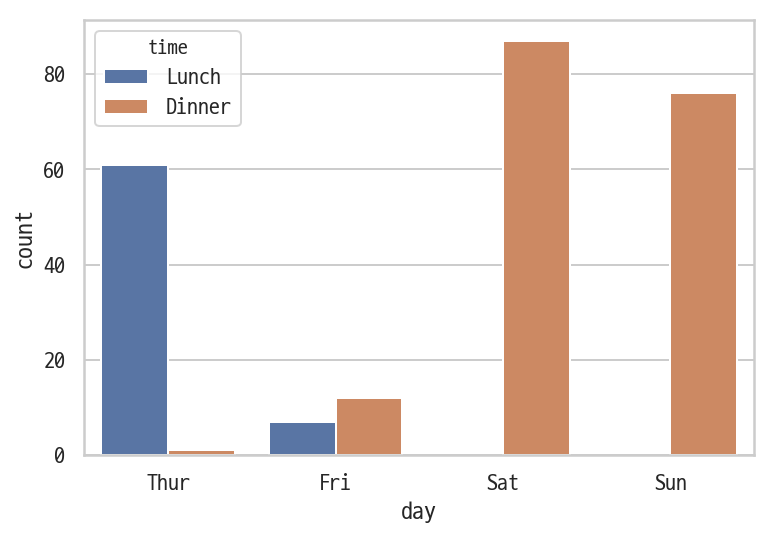

In [14]:
sns.countplot(data=tips, x="day", hue="time")
plt.show()

지금까지 알아본 것을 정리하면 다음과 같습니다.

- **요일`day`**  
목, 금, 토, 일의 데이터만 존재하며, 특히 금요일은 전체 데이터의 10%가 안 되는 양의 적은 데이터만 있다.     
또한, 요일의 종류로 본다면 평일이 목/금 이틀, 주말이 토/일 이틀로 구분할 수 있다.



- **시간`time`**   
런치와 디너 두 가지의 데이터를 가진다.   
그러나 런치는 목, 금요일에만 데이터가 있고, 토, 일 즉 주말에는 런치에 대한 데이터가 없고, 평일 디너의 데이터 개수는 매우 적다.    
따라서 시간으로 데이터를 분석할 때, **런치는 모두 평일 데이터이며, 디너는 주로 주말의 데이터**라는 점을 고려해야 한다.

### (4) `size` : 테이블 인원수

size는 테이블 인원수를 나타냅니다. 그렇다면, size가 커질수록 `total_bill`과 `tip`이 커질 것이라는 가설을 세울 수 있습니다.     
바로 확인해보겠습니다.

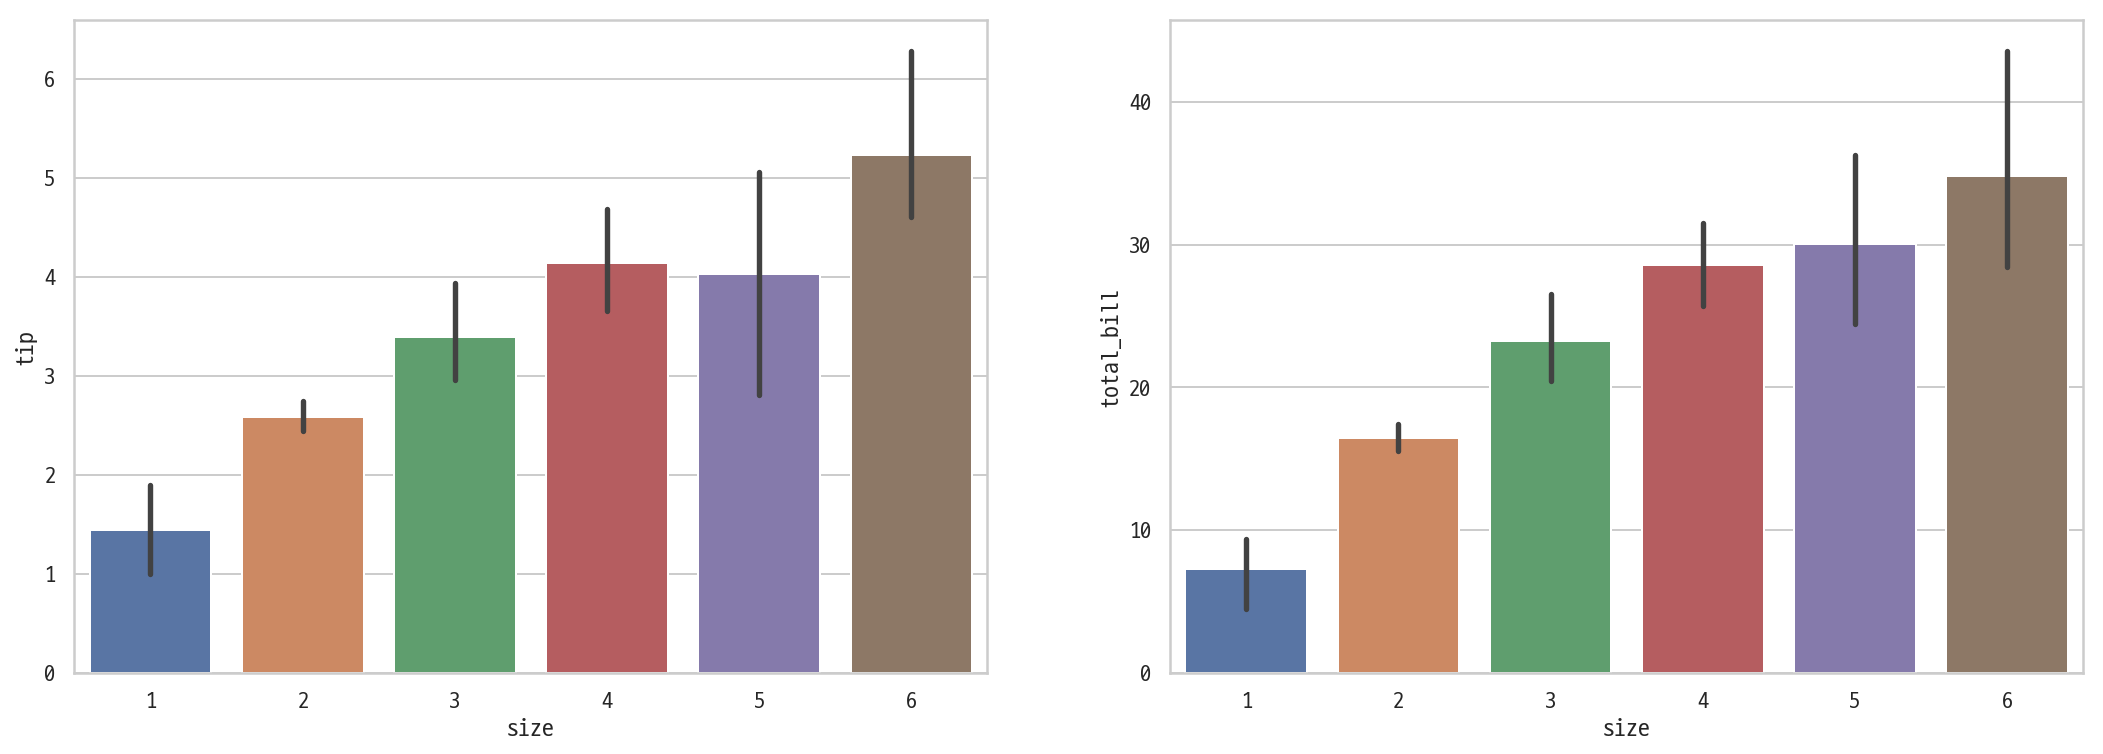

In [15]:
# subplot 사용
figure, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 6)

sns.barplot(data=tips, x="size", y="tip", ax=ax1)
sns.barplot(data=tips, x="size", y="total_bill", ax=ax2)
plt.show()

역시 예상대로 size가 커질수록 `tip`과 `total_bill`이 증가하는 경향을 보이는군요.     
Tip을 결정짓는 가장 중요한 요인 중 하나는 size가 될 것 같습니다.

잠깐! 여기서 그래프의 색상을 바꿀 수 있는 방법을 소개합니다.    
    
seaborn은 다양한 color palette를 제공하므로, 원하는 것을 골라서 사용할 수 있습니다. 
- https://seaborn.pydata.org/generated/seaborn.color_palette.html    


여기에서 다양한 컬러 팔레트를 확인하고, 원하는 팔레트를 골라서 사용하세요!

In [16]:
# sns.set_palette("Set2")
# sns.set_palette("Paired")
sns.set_palette("husl")

pallete를 `husl`로 설정하면 그래프가 어떻게 바뀔까요?

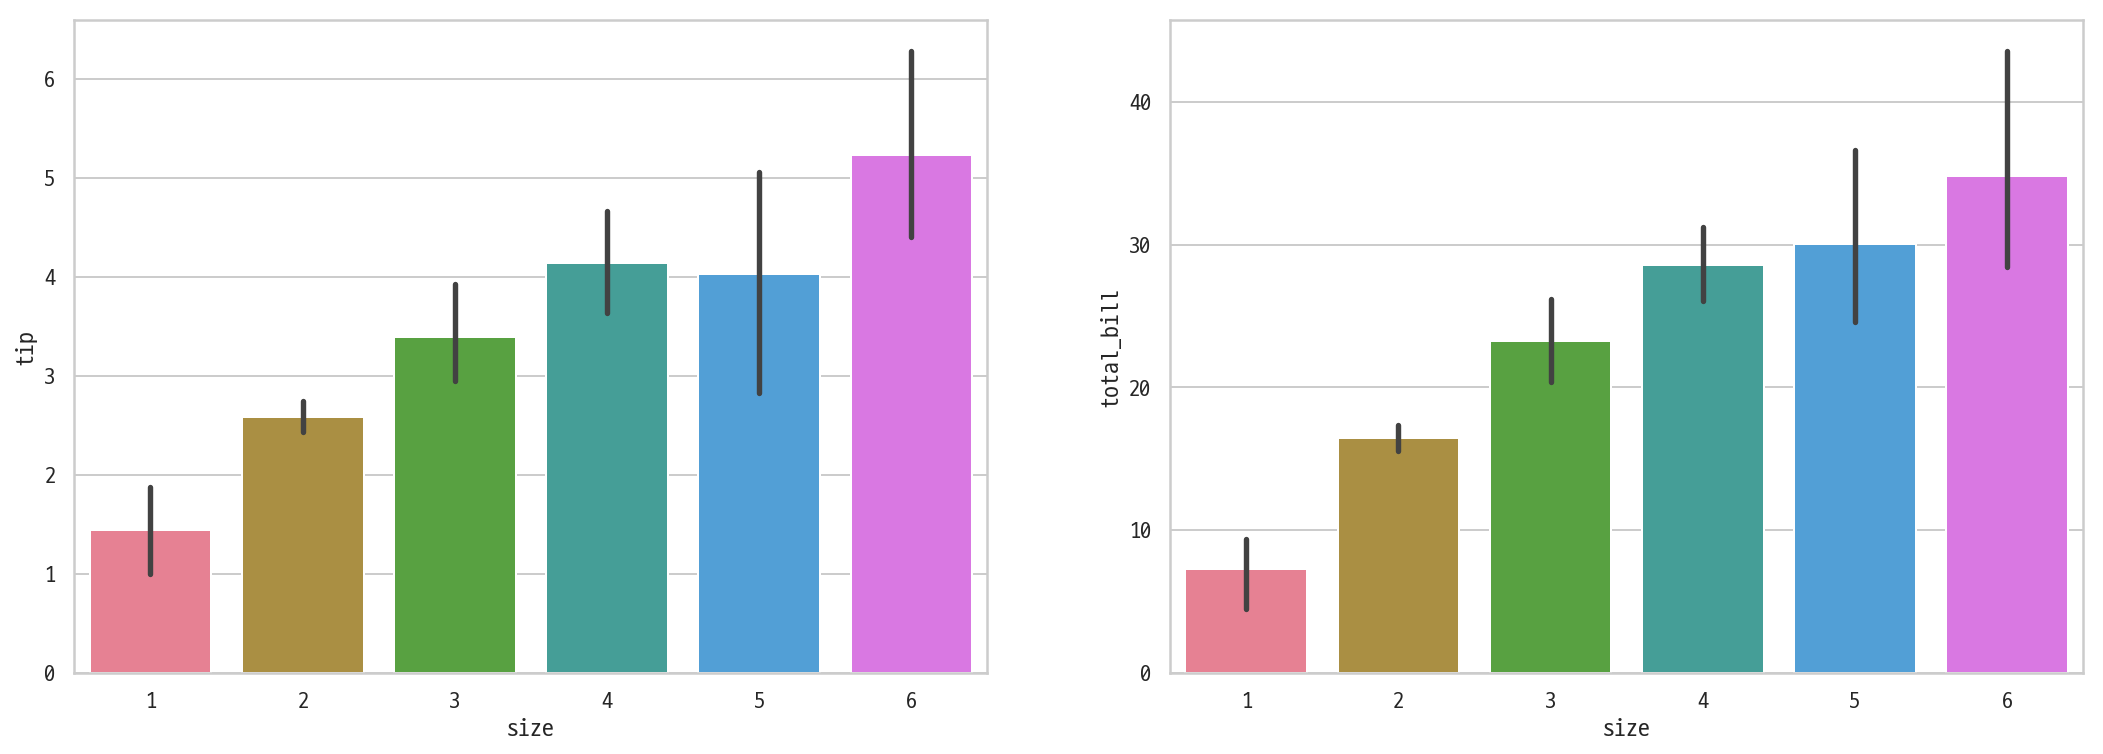

In [17]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 6)

sns.barplot(data=tips, x="size", y="tip", ax=ax1)
sns.barplot(data=tips, x="size", y="total_bill", ax=ax2)
plt.show()

다양한 색을 나타내는 그래프를 확인할 수 있습니다.

#### size별 데이터 개수는 어떨까?

size별 데이터는 몇 개씩 있을까요? 확인해봅시다.

In [18]:
tips.groupby("size").size().reset_index(name="counts")

,size,counts
0,1,4
1,2,156
2,3,38
3,4,37
4,5,5
5,6,4


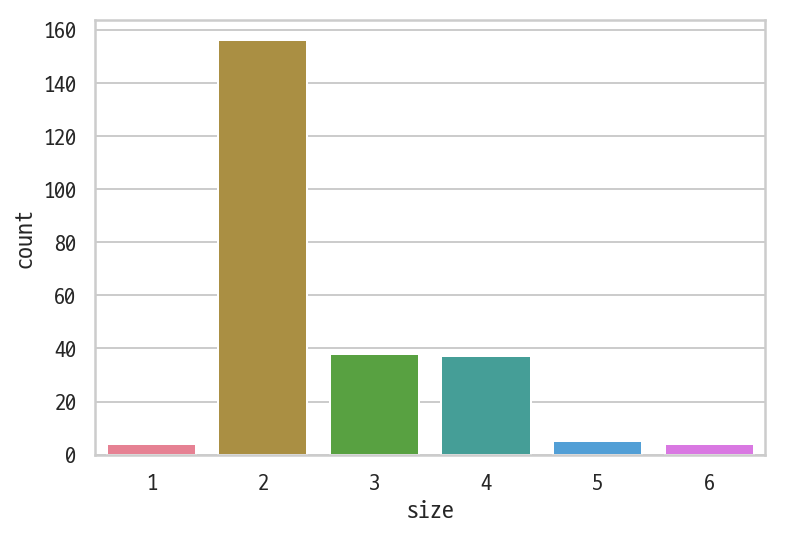

In [19]:
sns.countplot(data=tips, x = "size")
plt.show()

1인~6인 테이블이 존재하지만, 2인 테이블이 가장 많은 것을 확인할 수 있습니다.     
혼자 먹는 1인 테이블과 5인 이상의 테이블은 아주 희귀하군요. 5-6인 테이블은 팁을 많이 받겠지만, 많은 기회가 있진 않을 것이라 예상할 수 있습니다.

---

# 3. 가설을 세우고 그에 따라 세부 분석해보기

지금까지 데이터를 어느정도 살펴보았으니, 이제 원하는 목표를 위해 가설을 세운 후 세부적으로 분석을 해보겠습니다.     
여러분의 가설은 어떤가요?

## (1) 가설 첫 번째 : `size`는 `tip`을 결정짓는 중요한 요소이다

앞서 데이터를 살펴보면서 `size`가 `total_bill`과 `tips`를 결정짓는 중요한 요소임을 확인하였습니다.     
그렇다면 실제로 그런지 조금 더 구체적으로 살펴보죠!

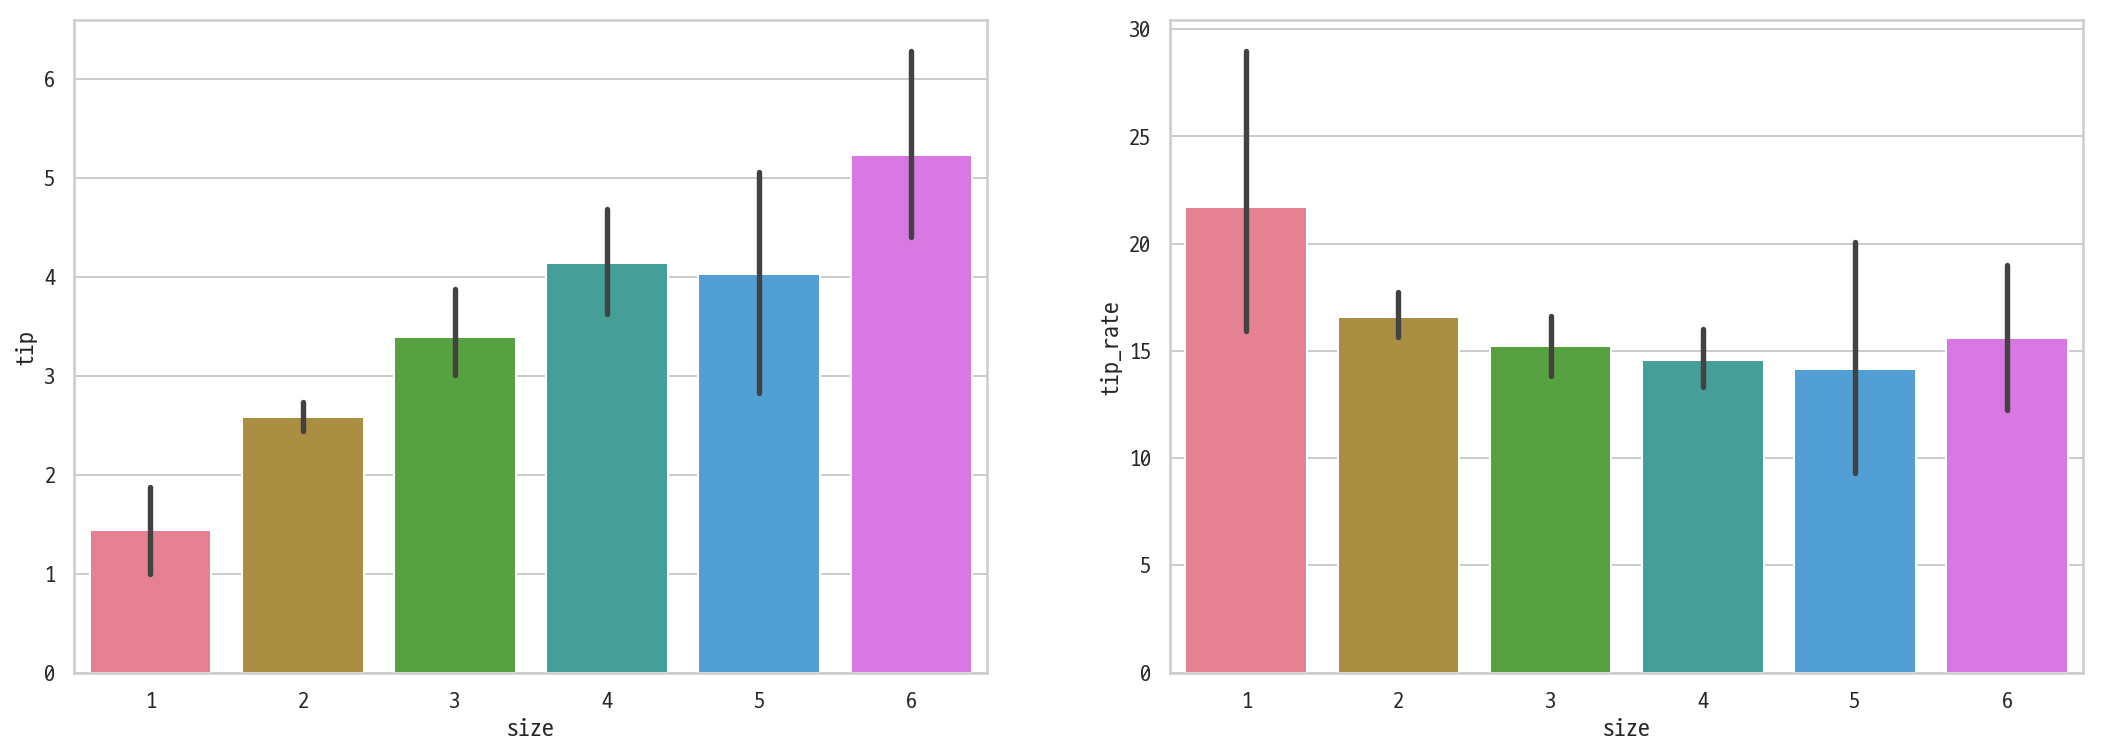

In [20]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 6)

sns.barplot(data=tips, x="size", y="tip", ax=ax1)
sns.barplot(data=tips, x="size", y="tip_rate", ax=ax2)
plt.show()

흠, 하지만 `tip_rate`를 살펴보았을 때는 `size`가 커질수록 팁을 주는 비율은 낮아지는 것이 확인됩니다.    
혼자 온 손님의 경우 20% 이상의 팁을 많이 주는 반면, 5-6인 테이블에서는 약 15% 내외로만 주는군요.    
비용이 높아질수록 `tip`의 절대적인 금액도 높아지므로 비율은 낮춰서 주는 것으로 파악됩니다.

#### 그렇다면 `total_bill`과 `tip_rate`의 관계는 어떨까?

`total_bill`과 `tip_rate`의 관계를 확인할 수 있는 그래프도 한 번 확인해보겠습니다.    
두 가지 데이터의 분포를 확인하고 싶은 경우, 점을 찍을 수 있는 산점도로 확인하면 편리합니다.     
seaborn은 간단한 추세선을 `fit_reg`로 확인할 수 있습니다. 추세선은 기본적으로 다항식으로 표현되는데, `order` 인자로 차수를 결정할 수 있습니다.

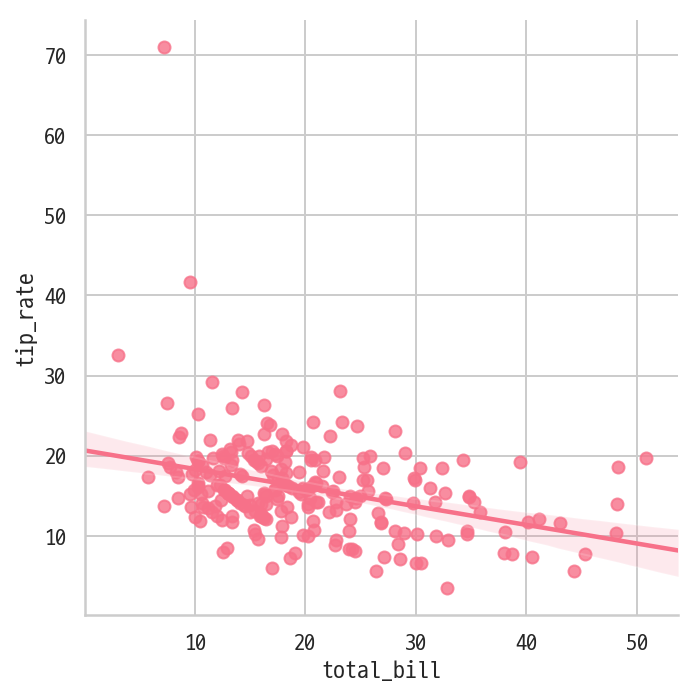

In [21]:
# order=1 인 경우: 1차 함수
sns.lmplot(data=tips, x="total_bill", y="tip_rate", fit_reg=True, order=1)
plt.show()

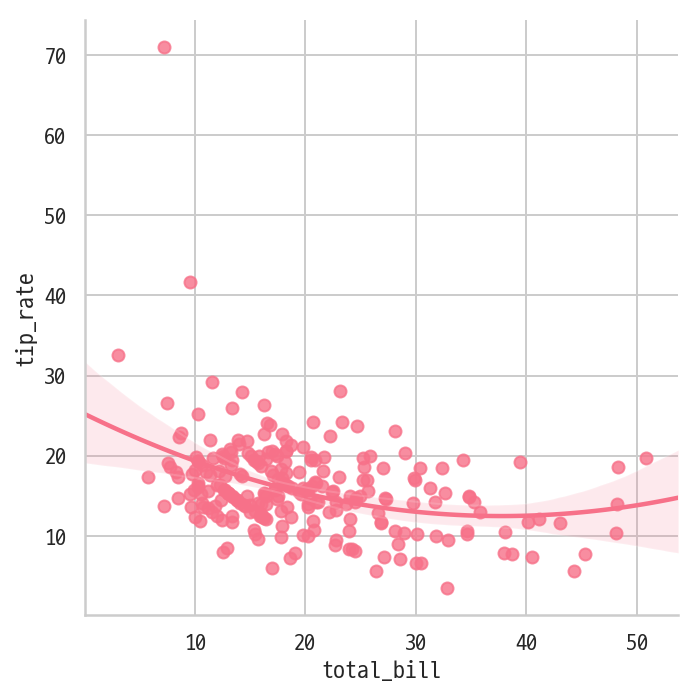

In [22]:
# order=2 인 경우: 2차 함수
sns.lmplot(data=tips, x="total_bill", y="tip_rate", fit_reg=True, order=2)
plt.show()

어떤가요? 같은 그래프이지만 추세선은 다르게 나타납니다.    
추가적으로, seaborn은 log 스케일의 추세선도 제공합니다. `logx` 인자를 True로 두면 되죠!

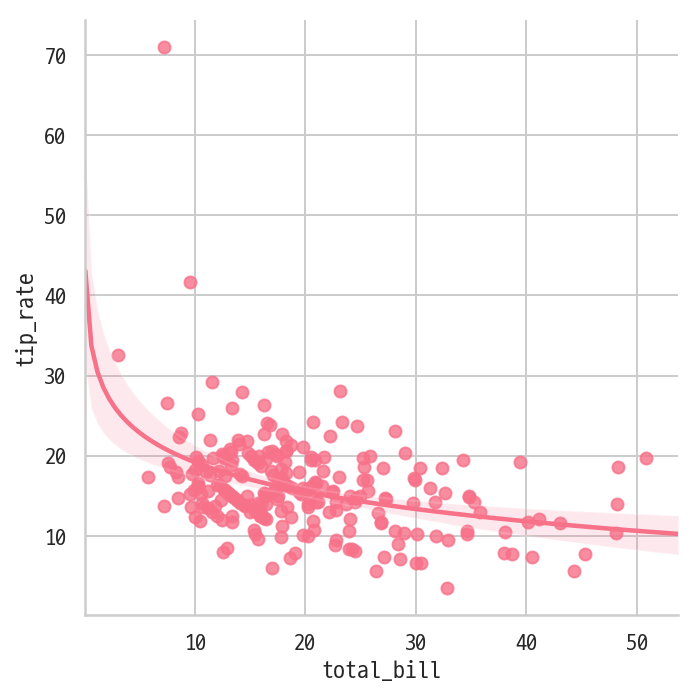

In [23]:
sns.lmplot(data=tips, x="total_bill", y="tip_rate", fit_reg=True, logx=True)
plt.show()

여러 그래프를 통해 `total_bill`과 `tip_rate`는 반비례하는 경향을 가지는 것을 확인할 수 있었습니다.    
또 한 가지 흥미로운 점은, 혼자서 엄청 떨어져 있는 특이한 tip_rate(70%이상, 40%이상) 가 있다는 점입니다. 이는 아웃라이어로, 데이터를 다룰 때 혼자 너무 떨어져 있는 데이터의 경우 전체적인 경향성을 확인하는 데에 부정적인 영향을 줄 수 있으므로 주의해야 합니다.    



이 데이터를 한번 확인해봅시다.

In [24]:
tips[tips["tip_rate"] > 50]

,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03,1


2명의 손님이 7불 가량의 저녁을 간단히 먹고 팁을 5불이나 냈나봅니다. 이 데이터는 아웃라이어에 해당하므로, 한 번 빼고 진행해보도록 하겠습니다.    
index를 확인했으니, pandas의 `drop` 함수로 간단히 할 수 있습니다

In [25]:
tips = tips.drop(172)
print(tips.shape)
tips.head()

(243, 9)


,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,1
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,1
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,1
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,1
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,1


1개의 행이 없어진 243개의 데이터셋이 되었습니다.

이제  다시 분포를 확인해봅시다. `hue` 인자에 `time`을 넣어 확인해 보겠습니다.

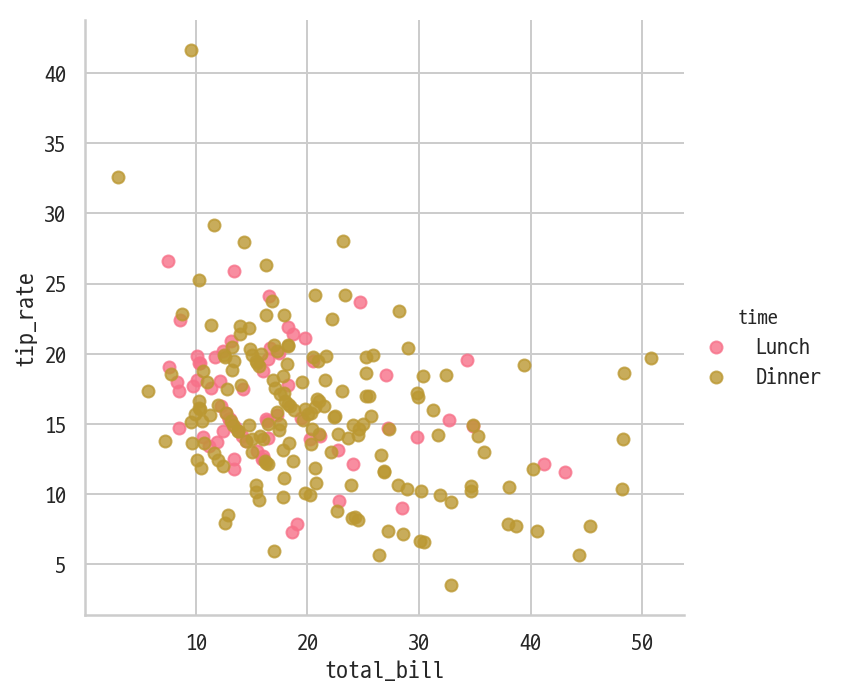

In [26]:
sns.lmplot(data=tips, x="total_bill", y="tip_rate", hue='time', fit_reg=False)
plt.show()

이제 전체적으로 혼자 엄청 떨어진 데이터 없이 정상적인 데이터 분포를 확이니할 수 있고, 반비례 관계를 가지는 것을 확인했습니다.

#### 그렇다면, `tip_rate`가 작은  큰 테이블이 좋은가, 아니면 `tip_rate`가 큰 작은 테이블이 좋은가?
이런 질문을 던져보지 않을 수 없겠죠! 바로 확인해봅시다.

먼저 우리가 원하는 컬럼인 `size`를 기준으로 `groupby`를 한 후, `describe` 함수를 이용해서 간단한 통계량을 한 번에 확인해보겠습니다.    
`describe`는 전체 데이터에 대한 통계량을 한 번에 볼 때 유용합니다.     

`describe`에서는 `"tip"` 데이터만 빼서 확인해보죠!

In [27]:
tips.groupby("size").describe()["tip"]

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1,4.0,1.437500,0.506516,1.00,1.0000,1.415,1.8525,1.92
2,155.0,2.565742,0.966660,1.00,2.0000,2.500,3.1250,5.85
3,38.0,3.393158,1.557344,1.36,2.3575,3.290,3.6825,10.00
4,37.0,4.135405,1.640668,2.00,3.0000,3.760,5.0700,9.00
5,5.0,4.028000,1.440111,2.00,3.0000,5.000,5.0000,5.14
6,4.0,5.225000,1.053170,4.20,4.8000,5.000,5.4250,6.70


여기서 우리가 주의해야 할 값은 1명 테이블의 팁의 최대값과 6명 테이블 팁의 최소값입니다. 


- 1명 테이블 팁 최대값 : 1.92
- 6명 테이블 팁 최소값 : 4.2


즉, `tip_rate`가 작다고 해도 `total_bill`이 크기 때문에 `tip`값은 절대적으로 클 수밖에 없는거죠.

따라서 이런 결론을 내릴 수 있습니다.
> **size가 큰 테이블은 작은 테이블보다 `tip_rate`가 작더라도 `tip` 금액은 클 것이다** 

### [가설 1] size는 tip을 결정짓는 거의 가장 중요한 요소이다 : 결론

  
`tip_rate`가 높더라도 `size`가 작다면 총 금액이 작아서, 비율로 환산할 시 실제로 받는 절대적인 tip 금액은 작다.   
그러므로, 일단은 **1순위로 size가 큰 테이블을 잡는 것이 유리하다.**

### 가설1의 결론을 낸 후의 고찰

하지만, size를 다시 한 번 상기해보면 어떤가요?

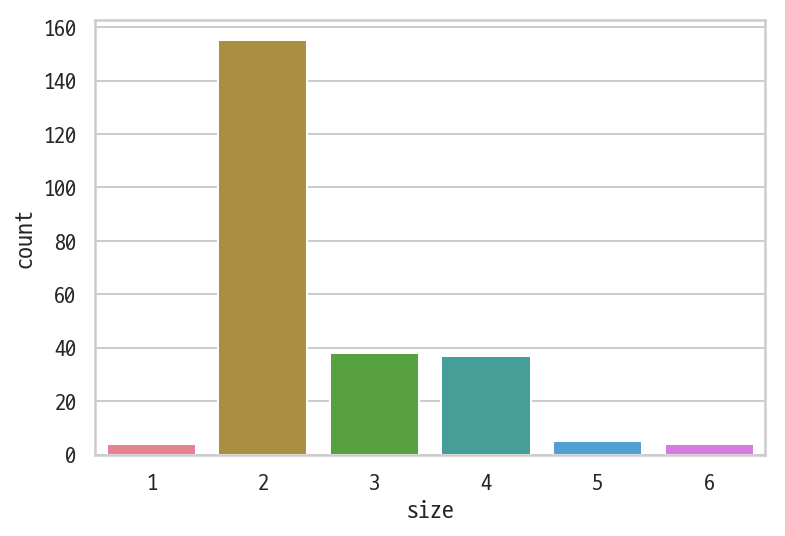

In [28]:
sns.countplot(data=tips, x = "size")
plt.show()

실제로 size는 2명인 테이블이 154개로 가장 압도적이고, 1명이거나 5명, 6명인 테이블은 각각 전체의 5%도 안되는 개수를 가집니다.    
따라서 큰 테이블을 잡는 것은 좋으나, 그 빈도는 높지 않을 것으로 예상됩니다.

## (2) 가설 두 번째 : `tip_rate`가 많이 낮은 손님은 어떤 이유가 있을것이다

그 다음으로 생각해볼 만한 주제는 바로 팁 비율입니다. 즉, 전체 금액 (`total_bill`)에 대해 팁을 얼마나 주는지에 대한 비율이죠.    
우리나라에는 팁문화가 없지만, 서양에서는 팁을 주는 것이 꽤 보편적인 문화이기 때문에 팁을 주는 비율도 어느정도 정해져 있습니다.    

그런데, 팁을 일반적인 수준보다 훨씬 낮게 주는 경우는 어떤 경우일까요? 서비스가 마음에 안 들었거나, 어떤 복합적인 이유가 있을 수 있습니다.    
우리가 가진 데이터셋에서 `tip_rate`가 특히 낮은 경우를 살펴보고, 그 이유는 어떤 것이 될 수 있는지 고민해보겠습니다.

먼저, 전체적인 팁의 비율은 몇 퍼센트 정도일까요?   
전체 데이터에서 `tip_rate`의 평균을 확인해봅시다.

In [29]:
print(tips.shape)
print(round(tips["tip_rate"].mean(), 2), "%")

(243, 9)
15.85 %


네, 15.85% 정도이군요. 서양권 문화에서 10~20% 정도를 팁으로 준다고 알고 있는 일반적인 값과 비슷한 것 같습니다.

자, 잠깐. 여기서 아까 `tip_rate`가 혼자서 70% 이상인 데이터를 뺐던 것을 기억하시나요?    
그렇다면 그 데이터가 포함된 원본 데이터에서는 평균이 얼마일까요? 확인해봅시다.

In [30]:
tips_original = original_data.copy()
print(tips_original.shape)
tips_original["tip_rate"] = tips_original["tip"] / tips_original["total_bill"] * 100
print(round(tips_original["tip_rate"].mean(), 2), "%")

(244, 7)
16.08 %


데이터 개수는 단 한 개만 차이가 나는데, 평균값은 0.2%가 넘게 차이가 납니다.       
큰 수치가 아니라고 느껴질 수도 있지만, 244개의 데이터 중 단 한개가 차지하는 비중으로 생각하면 꽤 큰 수치이죠.      
이렇게 아웃라이어는 단 하나의 데이터가 전체 데이터의 통계량에 크게 영향을 미칠 수 있으므로 주의해서 다루어야 합니다.

tip_rate의 분포를 히스토그램을 이용해서 살펴보겠습니다.     
히스토그램은 `plt.hist`와, `sns.distplot` 등으로 표현할 수 있습니다.     
특히, `bins` 라는 파라미터를 활용하면 히스토그램에 표시되는 막대의 개수를 조절해서 분포도를 얼마나 세분화해서 볼 수 있는지를 결정할 수 있습니다.

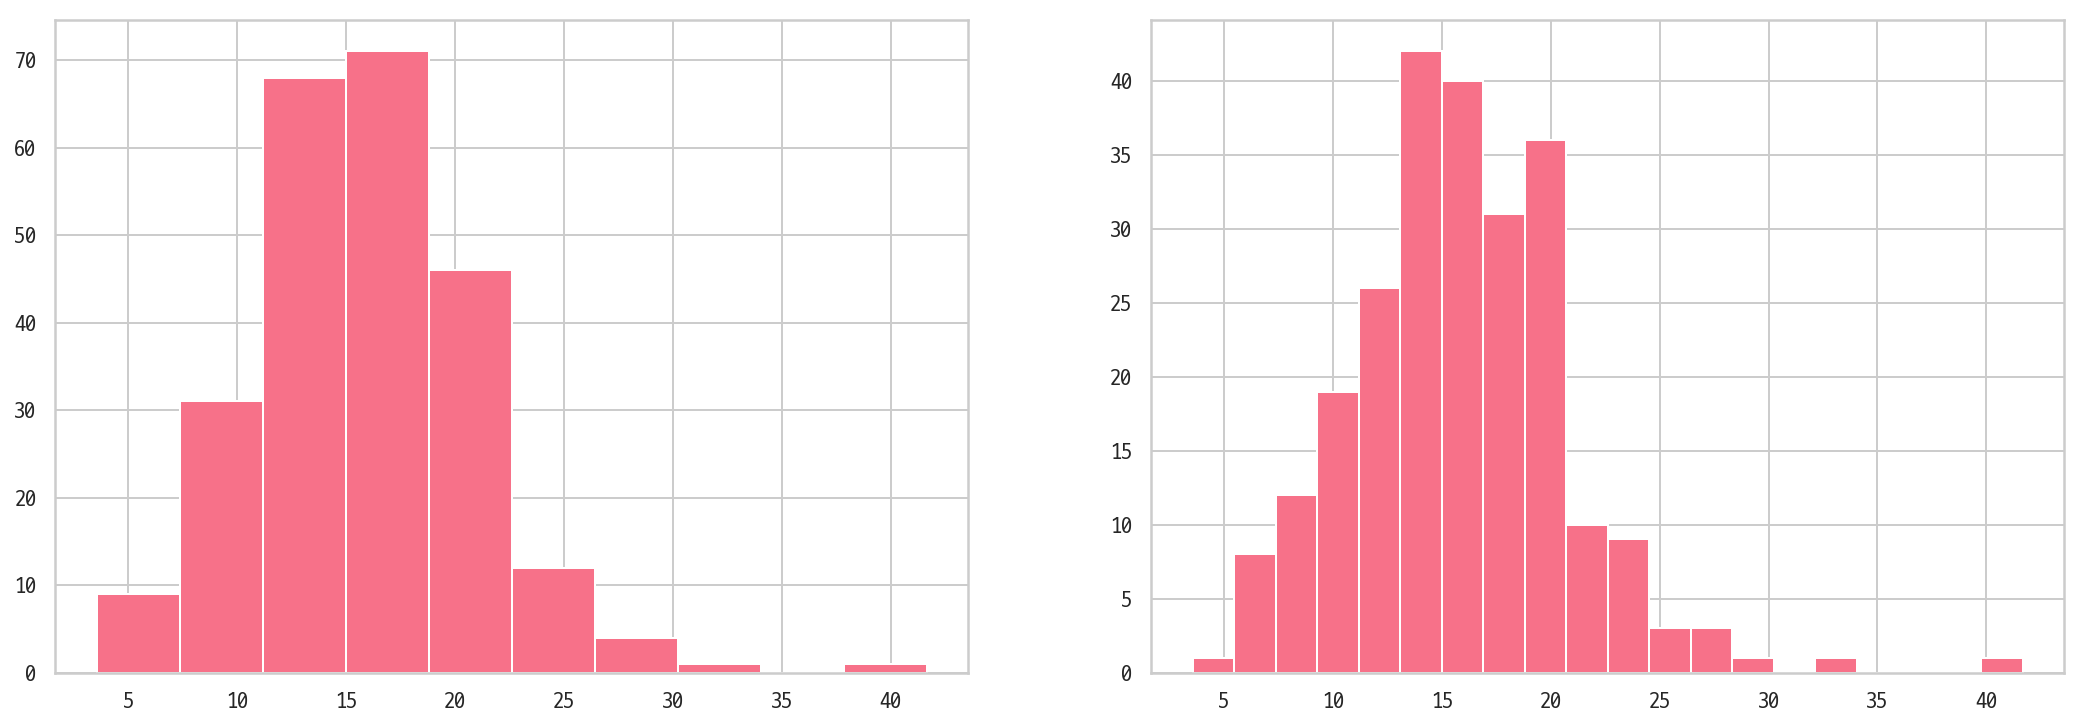

In [31]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.hist(tips["tip_rate"], bins=10)
plt.subplot(122)
plt.hist(tips["tip_rate"], bins=20)
plt.show()

seaborn의 distplot을 이용하면 간단한 추세선도 표시해줍니다.     
또한, distplot은 y축에 실제값이 아닌 전체에 대한 비율을 나타내는  상대도수값이 표시된다는  점도 다릅니다.

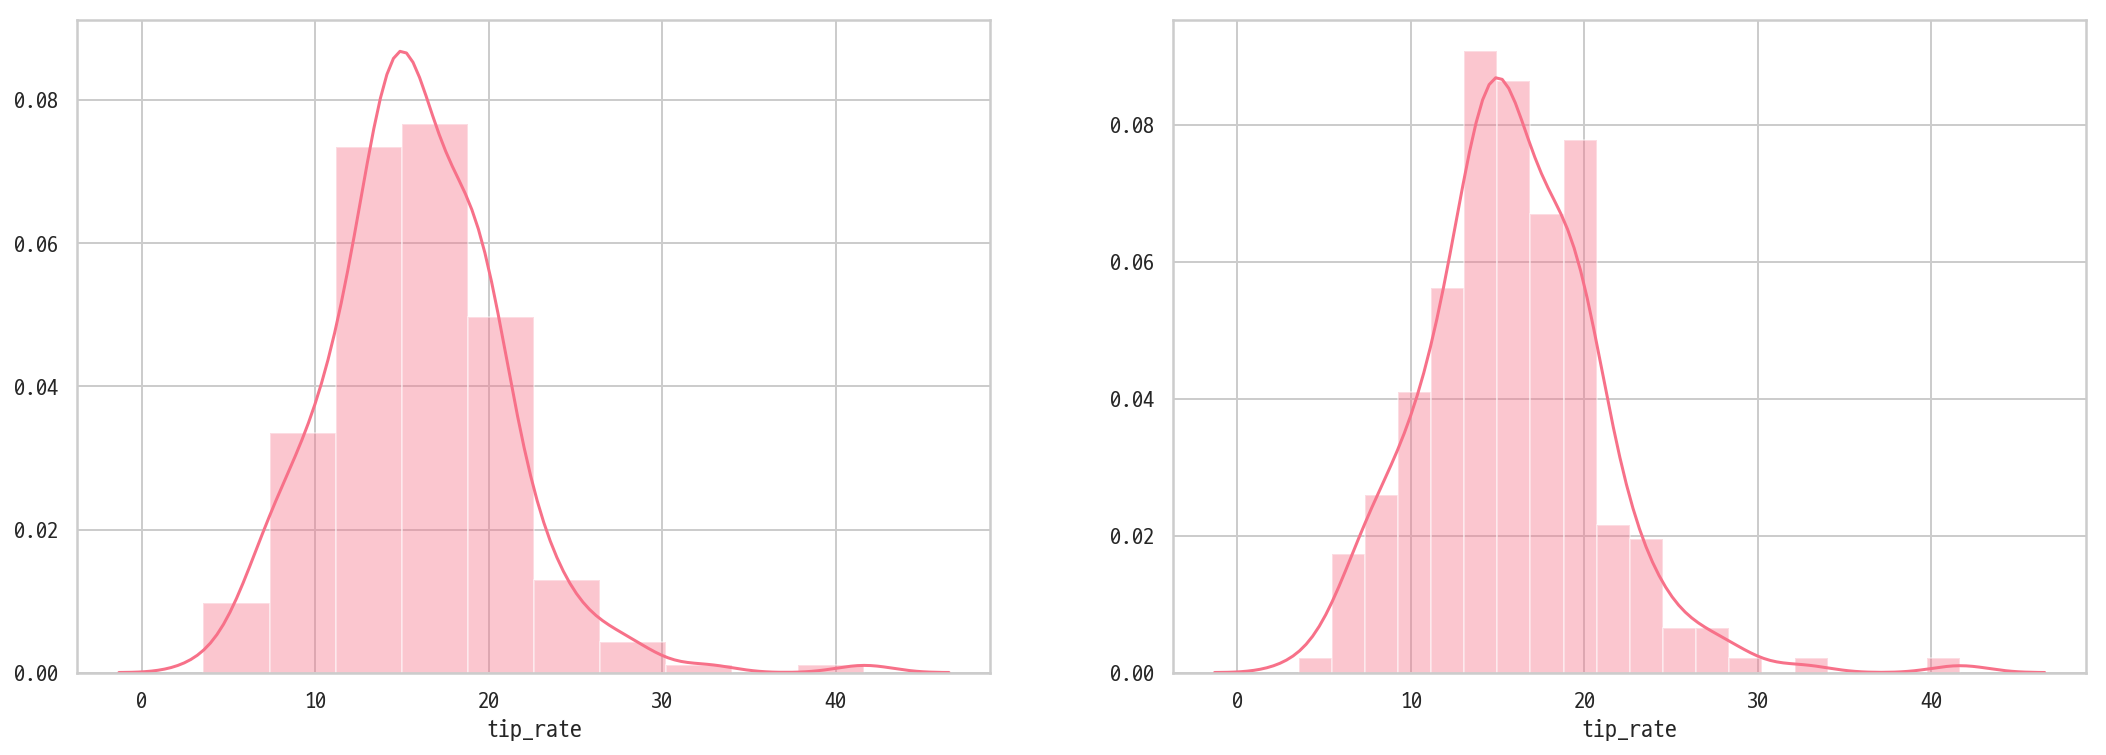

In [32]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
sns.distplot(tips["tip_rate"], bins=10)
plt.subplot(122)
sns.distplot(tips["tip_rate"], bins=20)
plt.show()

히스토그램을 보면, 약 10% ~ 20%구간에 데이터가 다수 몰려있다는 것을 알 수 있군요.

그렇다면 `tip_rate`를 구간 별로 나누어서 확인해보는 작업을 해보겠습니다.    
pandas의 `apply` 함수를 이용해서 새로운 컬럼을 만들어줄 것입니다.     


`apply`는 간단한 함수로 `lambda`를 활용해도 되지만, 함수가 복잡하다면 새로운 함수를 정의해서 사용해도 됩니다.     
팁의 구간을 정의하는 `tip_range` 함수를 만들어서 사용해보도록 하겠습니다.

In [33]:
def tip_range(tip_rate):
    if tip_rate <= 10:
        return "~10%"
    elif tip_rate <= 15:
        return "10~15%"
    elif tip_rate <= 20:
        return "15~20%"
    else:
        return "20%~"

잠깐, 여기서 apply를 한 번 더 뜯어보고 가시죠.    
`apply`는 `axis` 인자로 함수를 어느 방향으로 적용시킬 것인지를 결정할 수 있습니다.    
`axis=0`은 행 방향을, `axis=1`은 열 방향을 나타냅니다.

간단한 예시로 비교를 해보겠습니다.

In [34]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


여기에서 간단한 함수인 `np.sum`을 사용해보겠습니다. `axis=0`으로 설정하면 어떻게 될까요? (axis의 default값은 0입니다.)

In [35]:
df.apply(np.sum, axis=0)

A    12
B    27
dtype: int64

결과값은 모든 행을 더해서 만들어졌습니다.

In [36]:
df.apply(np.sum, axis=1)

0    13
1    13
2    13
dtype: int64

반면, `axis=1`을 쓰는 경우 모든 열을 더한 결과가 나왔죠.     


사실 pandas의 DataFrame을 사용하다보면 `axis`를 다루는 것에서 헷갈리는 경우가 많습니다.     
간단히 기억을 하고 싶다면, 이렇게 기억하면 됩니다!      



**"새로운 행을 만들고 싶다면 `axis=0`을, 새로운 열을 만들고 싶다면 `axis=1`을 사용한다!"**

그러면 우리는 `tip_rate_range`라는 새로운 **열**을 만들 예정이므로, `axis=1`을 사용하면 되겠군요!     
apply를 사용해보겠습니다.

In [37]:
tips["tip_rate_range"] = tips.apply(lambda row: tip_range(row.tip_rate), axis=1)
print(tips.shape)
tips.head()

(243, 10)


,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts,tip_rate_range
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,1,~10%
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,1,15~20%
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,1,15~20%
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,1,10~15%
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,1,10~15%


잘 만들어진 것 같습니다.    


결과를 그래프로도 한 번 확인해볼까요?

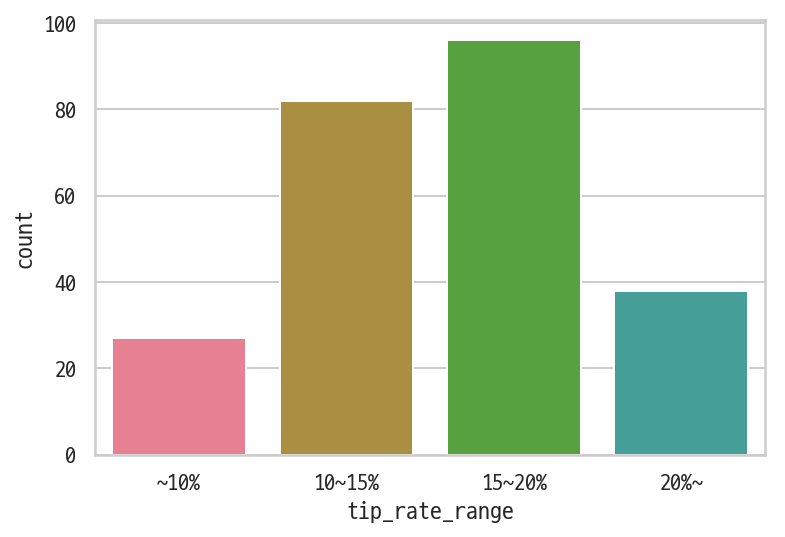

In [38]:
sns.countplot(data=tips, x = "tip_rate_range", order=["~10%", "10~15%", "15~20%", "20%~"])
plt.show()

중간값인 10~20%를 주는 손님이 대다수인 것 같습니다.     



그러면 팁을 평균보다 낮게 주는 경우는 어떤 경향성이 있을까요? 한 번 확인해보겠습니다.

### tip_rate 10% 이하의 경우

팁을 평균보다 더 낮게 주는 경우는 어떤 경우일까요?     
10%보다 낮은 팁을 준 사람들을 `under_10`이라는 새로운 DataFrame에 담아서 확인해보겠습니다.

In [39]:
under_10 = tips[tips["tip_rate_range"] == "~10%"]
print(under_10.shape)
under_10.head()

(27, 10)


,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts,tip_rate_range
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,1,~10%
48,28.55,2.05,Male,No,Sun,Dinner,3,7.18,1,~10%
56,38.01,3.00,Male,Yes,Sat,Dinner,4,7.89,1,~10%
57,26.41,1.50,Female,No,Sat,Dinner,2,5.68,1,~10%
68,20.23,2.01,Male,No,Sat,Dinner,2,9.94,1,~10%


smoker에 대해 어떤 양상을 가지는지 먼저 확인해보겠습니다.


다른 컬럼들에 대해서는 어떤 경향성을 가지는지도 확인해보세요!

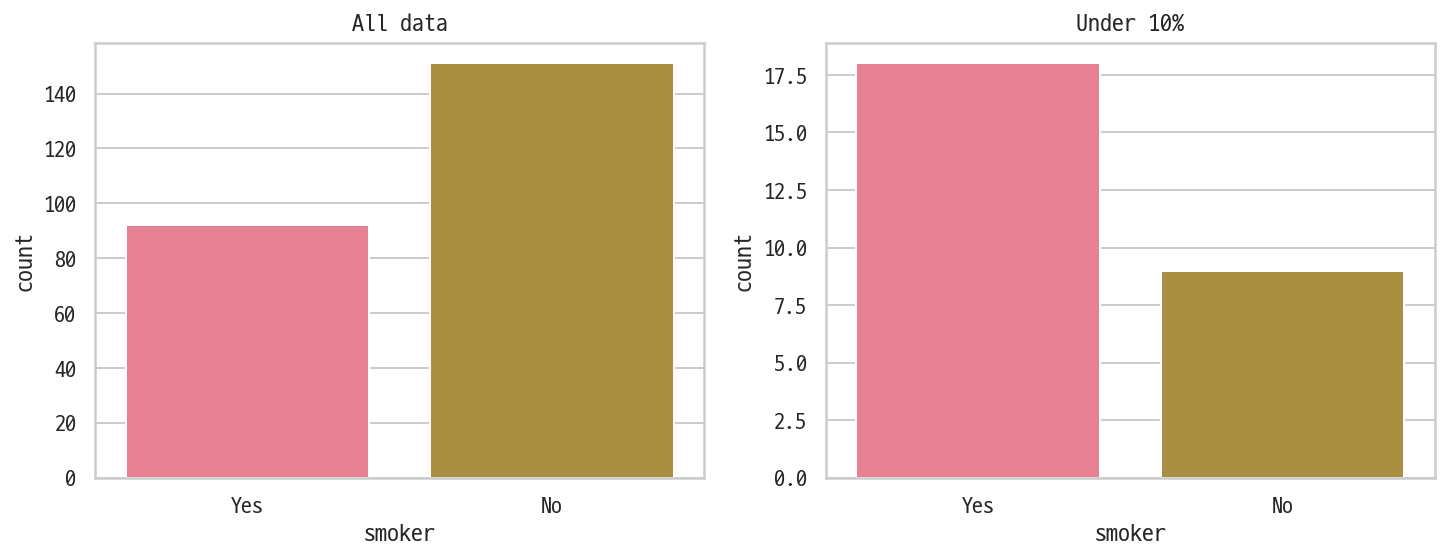

In [40]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(12, 4)

sns.countplot(data=tips, x="smoker", ax=ax1)
ax1.title.set_text("All data")
sns.countplot(data=under_10, x="smoker", ax=ax2)
ax2.title.set_text("Under 10%")

plt.show()

전체 데이터에는 Non-smoker의 비율이 더 높은데, 10%보다 낮은 팁을 주는 사람들의 데이터에서는 smoker의 비율이 높은 것으로 보이네요.     



이 데이터셋에 한해서는 smkoer가 낮은 팁을 줄 확률이 높다고 이야기 할 수 있겠습니다.    
다만, Under 10% 데이터셋의 데이터 개수 자체가 매우 작으므로, 일반화를 시켜서 이야기 할 수는 없겠죠.

### 팁을 20%보다 높게 주는 경우

한 가지만 더 확인해보고 넘어가겠습니다. 팁을 20%보다 높게 주는 경우는 어떨까요?


역시 20% 이상인 데이터를 모은 `upper_20`을 만들어보겠습니다.

In [42]:
upper_20 = tips[tips["tip_rate_range"] == "20%~"]
print(upper_20.shape)
upper_20.head()

(38, 10)


,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts,tip_rate_range
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81,1,20%~
9,14.78,3.23,Male,No,Sun,Dinner,2,21.85,1,20%~
14,14.83,3.02,Female,No,Sun,Dinner,2,20.36,1,20%~
17,16.29,3.71,Male,No,Sun,Dinner,3,22.77,1,20%~
18,16.97,3.50,Female,No,Sun,Dinner,3,20.62,1,20%~


이번에는 요일에 초점을 맞춰서 확인해보죠. 요일 별 상황을 확인해볼까요?

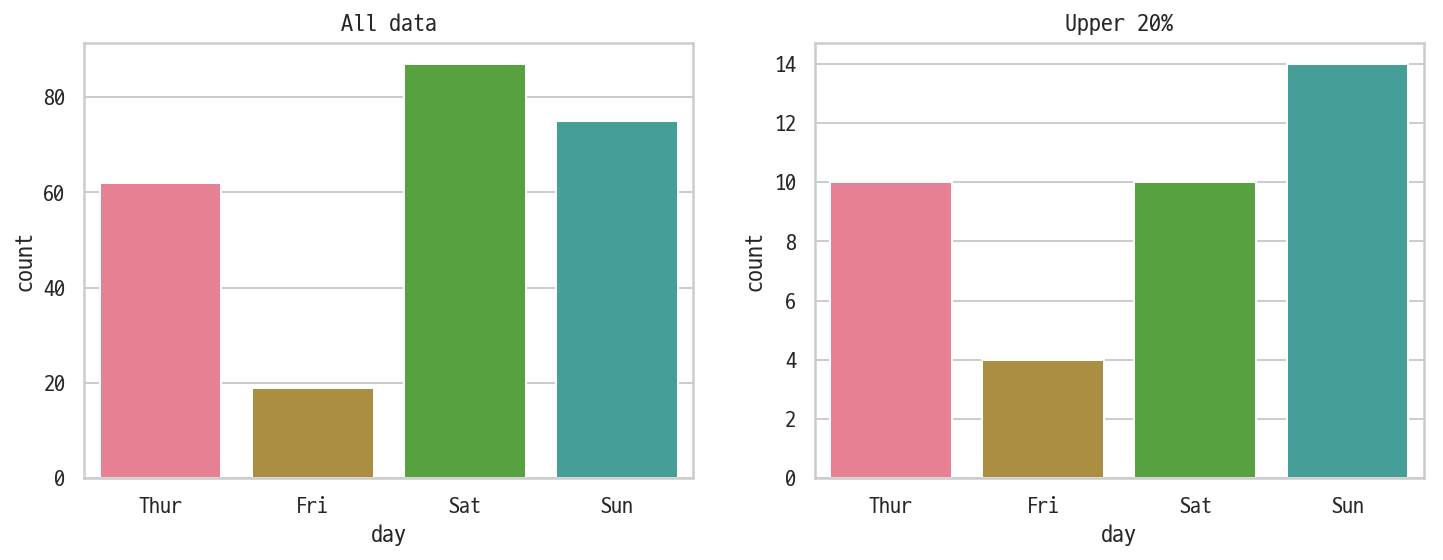

In [43]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(12, 4)

sns.countplot(data=tips, x="day", ax=ax1)
ax1.title.set_text("All data")
sns.countplot(data=upper_20, x="day", ax=ax2)
ax2.title.set_text("Upper 20%")

plt.show()

흥미로운 결과가 보입니다. 평일인 목/금요일의 양상은 비슷하지만, 토요일과 일요일은 서로 반대 양상을 보이네요.     
즉, 팁을 더 많이 주는 사람의 경우에는 토요일보다 일요일에 많은 것 같습니다.

그렇다면 이 둘을 비교해보면 어떨까요? **일요일에 non-smoker인 손님**과 **토요일에 smoker인 손님**을 비교해보는거죠.

역시 위에서 했던 것처럼 원하는 함수를 생성한 후 `apply`로 새로운 컬럼을 만들어보겠습니다.

In [44]:
def get_category(smoker, day):
    if smoker == "No" and day == "Sun":
        return "sunday_non_smoker"
    elif smoker == "Yes" and day == "Sat":
        return "saturday_smoker"
    else:
        return "else"

In [45]:
tips["category"] = tips.apply(lambda i: get_category(i.smoker, i.day), axis=1)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts,tip_rate_range,category
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,1,~10%,sunday_non_smoker
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,1,15~20%,sunday_non_smoker
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,1,15~20%,sunday_non_smoker
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,1,10~15%,sunday_non_smoker
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,1,10~15%,sunday_non_smoker


잘 만들어졌네요!    



이번에는 조금 새로운 그래프를 활용해보죠. `box_plot`과 `violin_plot`입니다.    
두 그래프는 모두 데이터의 분포 자체를 확인하고 싶을 때 유용합니다.

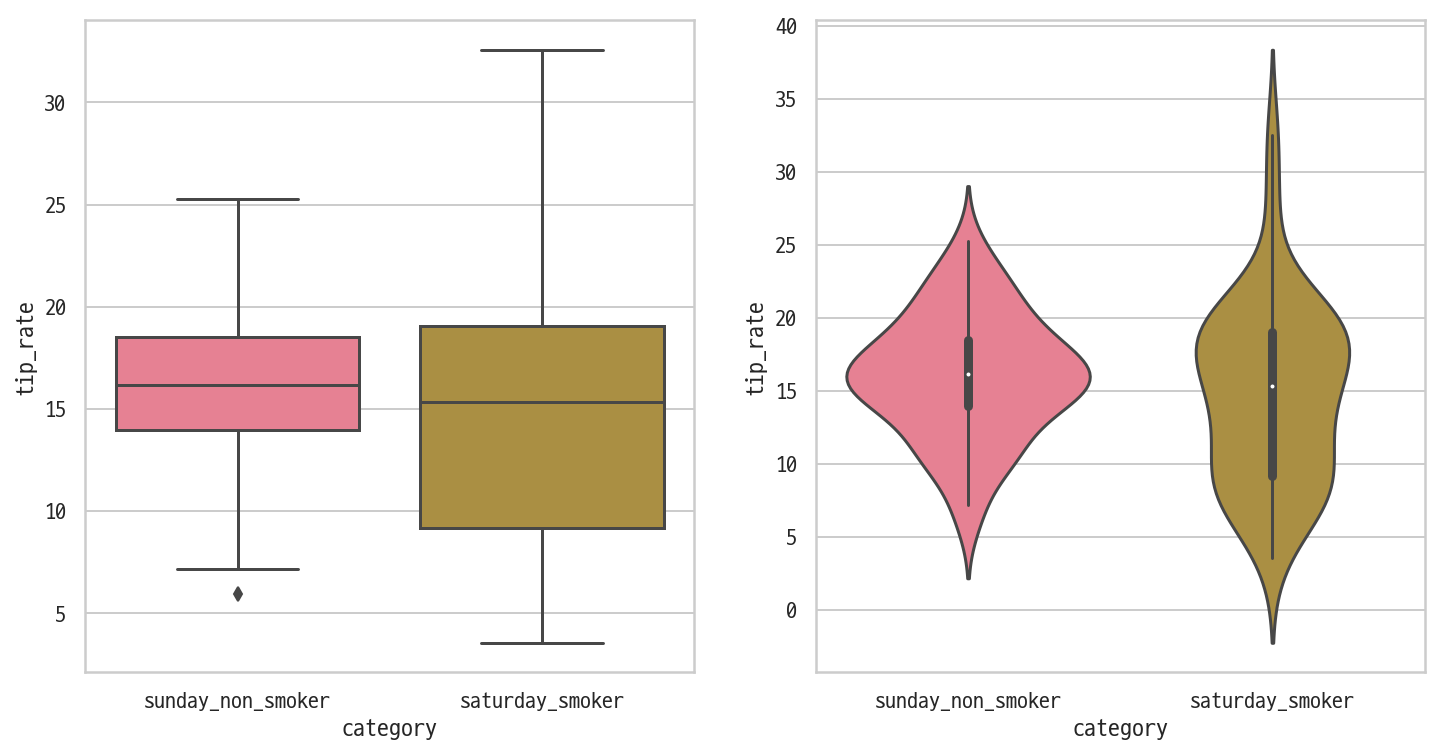

In [46]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.boxplot(x="category", y="tip_rate", data=tips, order=["sunday_non_smoker", "saturday_smoker"])
plt.subplot(122)
sns.violinplot(x="category", y="tip_rate", data=tips, order=["sunday_non_smoker", "saturday_smoker"])
plt.show()

boxplot에서 box와 양끝 꼬리가 나타내는 것은 Quantile을 포함한 통계량입니다.      
자세한 내용은 여기에서 확인할 수 있습니다.    
- https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
    
    
violinplot은 데이터의 분포 자체를 확인할 수 있기 때문에 더 구체적인 분포양상을 알 수 있습니다.     




예를 들어, `sunday_non_smoker`의 경우 중간값에 더 몰려있는, 즉 분산이 더 작은 분포를 가지는 반면     
`saturday_smoker`의 경우 `sunday_non_smoker`보다 아래쪽으로 넓게 분포해있는 것을 확인할 수 있습니다.      
이는 낮은 값의 tip_rate를 가질 경향이 높다는 말과 같습니다.      



(정확히 이야기하자면 확실하게 확률이 높다고 이야기 할 수는 없습니다. 각 카테고리별로 몇 개의 데이터가 있는지를 함께 고려해야하기 때문입니다.)

### [가설 2] `tip_rate`가 많이 낮은 손님은 어떤 이유가 있을것이다 : 결론

  
전체 데이터의 smoker 비율은 non-smoker보다 낮은 반면, `tip_rate`가 낮은 집단에서는 smoker의 비율이 크게 높았습니다.     
이는 smoker는 팁을 낮게 주는 경향성이 있다고 볼 수 있습니다. 다만, 데이터셋의 크기가 작기 때문에 일반화를 시킬 수는 없다는 점을 주의해야 합니다.